In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def round_to_nearest_phase(lag_value):
    rounded_value = round(lag_value / 3) * 3
    if rounded_value >= 24:
        rounded_value -= 24
    return rounded_value

def phasedraw_groups(ax, phase, scalenum, color):
    rounded_phase = {}
    for lag, count in phase.items():
        rounded_lag = round_to_nearest_phase(lag)
        rounded_phase[rounded_lag] = rounded_phase.get(rounded_lag, 0) + count
    
    # Define the sectors starting from the top and proceeding clockwise
    sectors = np.linspace(0, 2 * np.pi, 8, endpoint=False)
    
    # Define the bar heights based on the phase data
    heights = [rounded_phase.get(lag, 0) for lag in range(0, 24, 3)]
    
    # Plot the bars on the axes
    ax.bar(sectors, heights, width=np.pi / 4, bottom=0.0, color=color, edgecolor='white')
    
    # Set 0 degrees to the top and the direction of degrees to be clockwise
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    
    # Set the labels correctly for the x-ticks
    ax.set_xticks(sectors)
    ax.set_xticklabels([str((lag % 24)) for lag in range(0, 24, 3)], fontsize=10, fontweight='bold')
    
    ax.yaxis.grid(True)
    ax.xaxis.grid(True)
    
    radii_interval = max(1, scalenum // 4)
    radii_ticks = np.arange(radii_interval, scalenum + radii_interval, radii_interval)
    ax.set_yticks(radii_ticks)
    ax.set_yticklabels([str(int(r)) for r in radii_ticks], fontsize=8, color='black')

In [ ]:
# List of file paths (these need to be the correct paths to your data files)
file_paths_WT = [
    'JTKresult_nr1d1_WT_WT_only.txt',
    'JTKresult_hdac3_WT_WT_only.txt',
    'JTKresult_nfil3_WT_WT_only.txt',
    'JTKresult_GF_WT_only.txt'
]

# Adjust the figsize to better fit your data if necessary
fig, axs = plt.subplots(2, 2, figsize=(10, 10), subplot_kw={'projection': 'polar'})
axs = axs.flatten()

for file_path, ax in zip(file_paths_WT, axs):
    df = pd.read_csv(file_path, sep="\t")
    phase_counts = df['LAG'].value_counts()
    scalenum = max(phase_counts) + 1  # Add a buffer to the maximum count for scale
    
    phasedraw_groups(ax, phase_counts.to_dict(), scalenum, 'hotpink')
    ax.set_title(file_path.split('_')[1].split('.')[0], fontsize=14, pad=20)  # Adjust title position and add padding

# Adjust the layout to prevent overlapping and to make sure that labels are visible
plt.tight_layout(pad=4.0)
fig.subplots_adjust(top=0.85)  # Adjust the top space to fit the main title
fig.suptitle('WT Phase Comparison', fontsize=16)

# Save the figure to a file
output_file_path = 'WT_Phase_Subplots_Corrected.pdf'
plt.savefig(output_file_path)
plt.show()

In [17]:
df = pd.read_csv('LAG.txt', sep="\t")
df


,peak,gene,CV_amplitude,CV_phase,GF_LAG,GF_mean,GF_pvalue,GF_qvalue,GF_fdr_BH
0,chr1_4783493_4786944,Mrpl15,52.605422,10.471824,0.933138,355.239153,0.035213,0.003000,0.269018
1,chr1_4806713_4811238,Lypla1,108.759645,10.868518,20.394261,565.183389,0.188224,0.003424,0.307075
2,chr1_4855961_4859931,Tcea1,62.640823,11.472083,0.465709,388.566761,0.073235,0.003031,0.271816
3,chr1_5082507_5084687,Atp6v1h,47.665297,10.699908,2.121451,272.175974,0.285309,0.004010,0.359593
4,chr1_6211969_6217033,Rb1cc1,143.804559,11.287286,1.014155,660.824894,0.053991,0.003031,0.271816
...,...,...,...,...,...,...,...,...,...
10878,chrY_897172_899608,Kdm5d,32.010317,9.082203,0.376119,245.675463,0.099870,0.003045,0.273031
10879,chrY_1009337_1011988,Eif2s3y,36.943462,9.566163,2.203537,251.003387,0.301645,0.004119,0.369401
10880,chrY_1244057_1246429,Uty,48.485626,9.856116,0.280457,200.309732,0.131451,0.003084,0.276534
10881,chrY_1284701_1286964,Ddx3y,32.544306,9.853177,1.851386,241.583948,0.241422,0.003741,0.335484


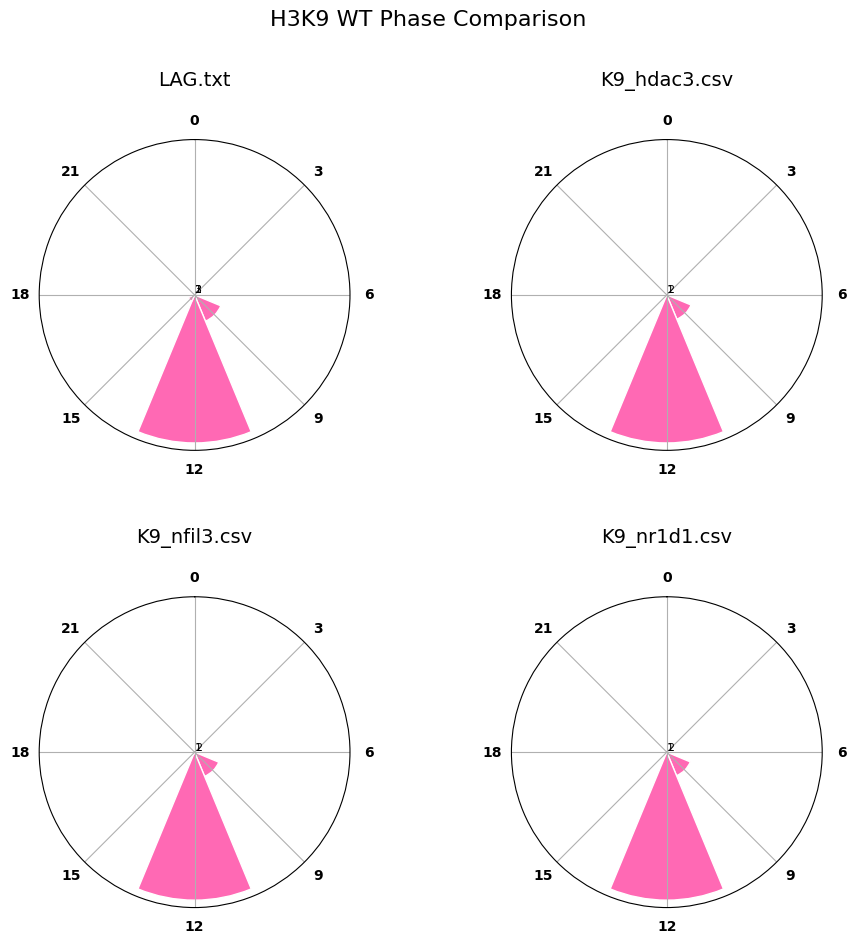

In [18]:
# List of file paths (these need to be the correct paths to your data files)
file_paths_WT = [
    'LAG.txt',
    'K9_hdac3.csv',
    'K9_nfil3.csv',
    'K9_nr1d1.csv'
]

# Adjust the figsize to better fit your data if necessary
fig, axs = plt.subplots(2, 2, figsize=(10, 10), subplot_kw={'projection': 'polar'})
axs = axs.flatten()

for file_path, ax in zip(file_paths_WT, axs):
    df = pd.read_csv(file_path, sep="\t")
    phase_counts = df['CV_phase'].value_counts()
    scalenum = max(phase_counts) + 1  # Add a buffer to the maximum count for scale
    
    phasedraw_groups(ax, phase_counts.to_dict(), scalenum, 'hotpink')
    ax.set_title(file_path, fontsize=14, pad=20)  # Adjust title position and add padding

# Adjust the layout to prevent overlapping and to make sure that labels are visible
plt.tight_layout(pad=4.0)
fig.subplots_adjust(top=0.85)  # Adjust the top space to fit the main title
fig.suptitle('H3K9 WT Phase Comparison', fontsize=16)

# Save the figure to a file
output_file_path = 'WT_Phase_Subplots_Corrected.pdf'
plt.savefig(output_file_path)
plt.show()



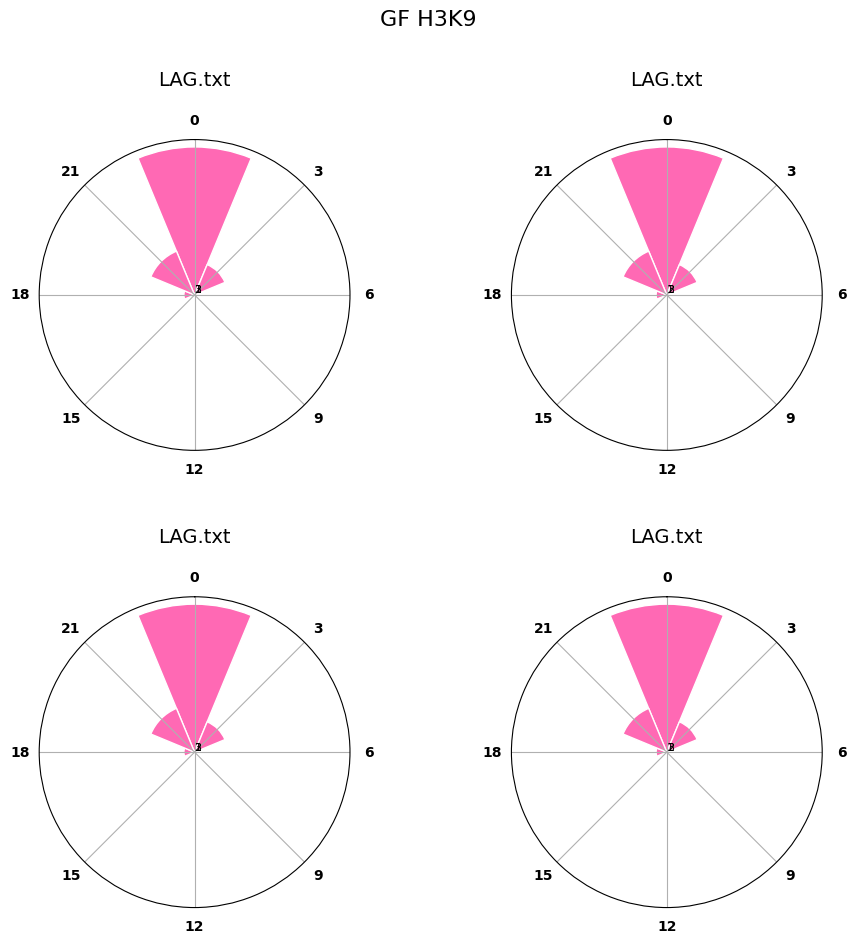

In [23]:
# List of file paths (these need to be the correct paths to your data files)
file_paths_WT = [
    'LAG.txt',
    'LAG.txt',
    'LAG.txt',
    'LAG.txt'
]

# Adjust the figsize to better fit your data if necessary
fig, axs = plt.subplots(2, 2, figsize=(10, 10), subplot_kw={'projection': 'polar'})
axs = axs.flatten()

for file_path, ax in zip(file_paths_WT, axs):
    df = pd.read_csv(file_path, sep="\t")
    phase_counts = df['GF_LAG'].value_counts()
    scalenum = max(phase_counts) + 1  # Add a buffer to the maximum count for scale
    
    phasedraw_groups(ax, phase_counts.to_dict(), scalenum, 'hotpink')
    ax.set_title(file_path, fontsize=14, pad=20)  # Adjust title position and add padding

# Adjust the layout to prevent overlapping and to make sure that labels are visible
plt.tight_layout(pad=4.0)
fig.subplots_adjust(top=0.85)  # Adjust the top space to fit the main title
fig.suptitle('GF H3K9', fontsize=16)

# Save the figure to a file
output_file_path = 'WT_Phase_Subplots_Corrected.pdf'
plt.savefig(output_file_path)
plt.show()





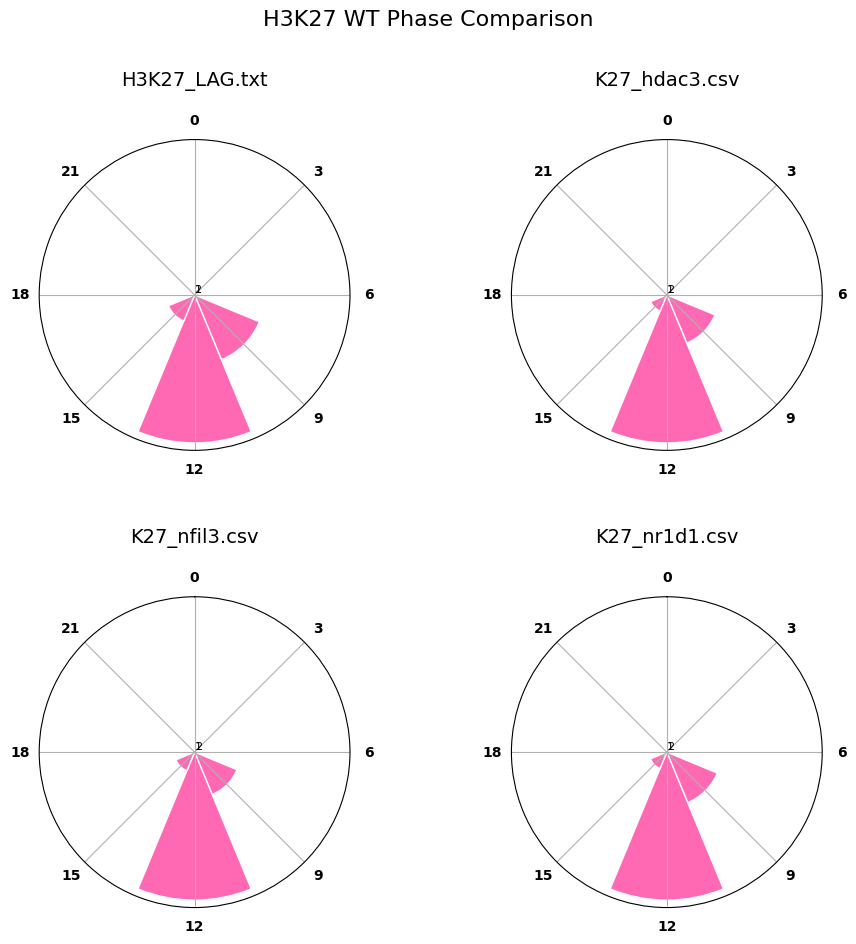

In [22]:
# List of file paths (these need to be the correct paths to your data files)
file_paths_WT = [
    'H3K27_LAG.txt',
    'K27_hdac3.csv',
    'K27_nfil3.csv',
    'K27_nr1d1.csv'
]

# Adjust the figsize to better fit your data if necessary
fig, axs = plt.subplots(2, 2, figsize=(10, 10), subplot_kw={'projection': 'polar'})
axs = axs.flatten()

for file_path, ax in zip(file_paths_WT, axs):
    df = pd.read_csv(file_path, sep="\t")
    phase_counts = df['CV_phase'].value_counts()
    scalenum = max(phase_counts) + 1  # Add a buffer to the maximum count for scale
    
    phasedraw_groups(ax, phase_counts.to_dict(), scalenum, 'hotpink')
    ax.set_title(file_path, fontsize=14, pad=20)  # Adjust title position and add padding

# Adjust the layout to prevent overlapping and to make sure that labels are visible
plt.tight_layout(pad=4.0)
fig.subplots_adjust(top=0.85)  # Adjust the top space to fit the main title
fig.suptitle('H3K27 WT Phase Comparison', fontsize=16)

# Save the figure to a file
output_file_path = 'WT_Phase_Subplots_Corrected.pdf'
plt.savefig(output_file_path)
plt.show()